# Importing all dependendencies (library)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split

# Importing of Data

In [2]:
# Examining of Data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.shape

(418, 11)

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("train_shape: ", train_data.shape)
print("test_shape: ", test_data.shape)

train_shape:  (891, 12)
test_shape:  (418, 11)


# Basic Data Exploration

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checking for missing value

In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
missing_value = train_data.isnull().sum()
missing_value[missing_value>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [13]:
avg_age = train_data["Age"].mean(axis=0)
print("The Average of Age is: ", avg_age)
train_data["Age"].fillna(avg_age,inplace=True)

The Average of Age is:  29.69911764705882


In [14]:
avg_age1 = test_data["Age"].mean(axis=0)
print("The Average of Age is: ", avg_age1)
test_data["Age"].fillna(avg_age1,inplace=True)

The Average of Age is:  30.272590361445783


In [15]:
train_data["Cabin"].fillna("unknow", inplace=True)
test_data["Cabin"].fillna("unknow", inplace=True)

In [16]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
# Filling missing value
train_data["Embarked"].fillna(train_data.Embarked.mode, inplace=True)

In [18]:
test_data["Fare"].fillna(test_data.Fare.mode, inplace=True)

# Data visualization

<Axes: xlabel='Survived', ylabel='count'>

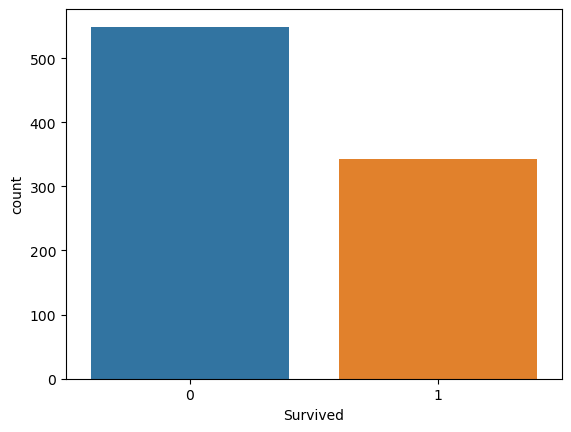

In [19]:
# Target Value Survived
sns.countplot(data = train_data, x=train_data["Survived"])

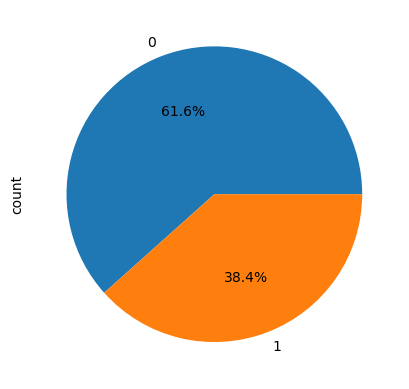

In [20]:
train_data["Survived"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

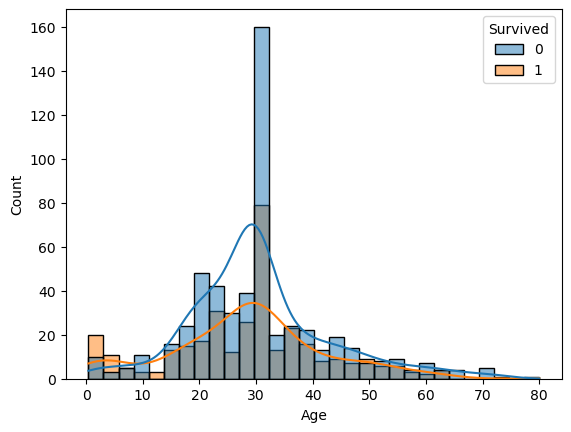

In [21]:
sns.histplot(data=train_data, x=train_data["Age"], hue=train_data["Survived"], kde=True)

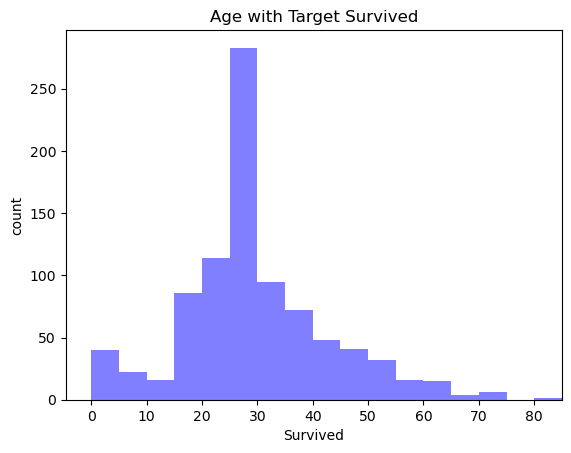

In [22]:
data = train_data.Age
bins = np.arange(-100,100,5)
plt.xlim([min(data)-5, max(data)+5])
hue = train_data.Survived

plt.hist(data, bins=bins, color="blue", alpha=0.5)
plt.title("Age with Target Survived")
plt.xlabel("Survived")
plt.ylabel("count")

plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

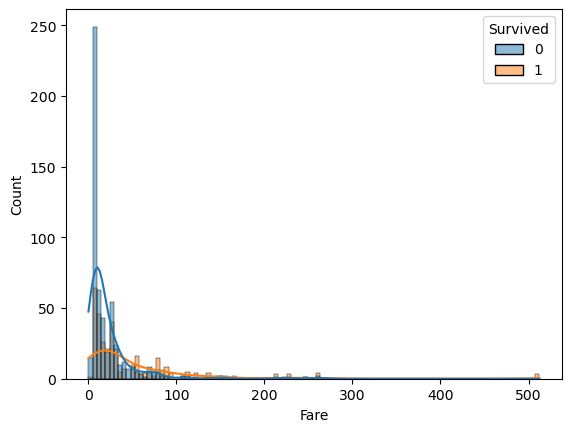

In [23]:
sns.histplot(data=train_data, x=train_data["Fare"], hue = train_data["Survived"], kde=True, color="blue")

# Data Column Sex

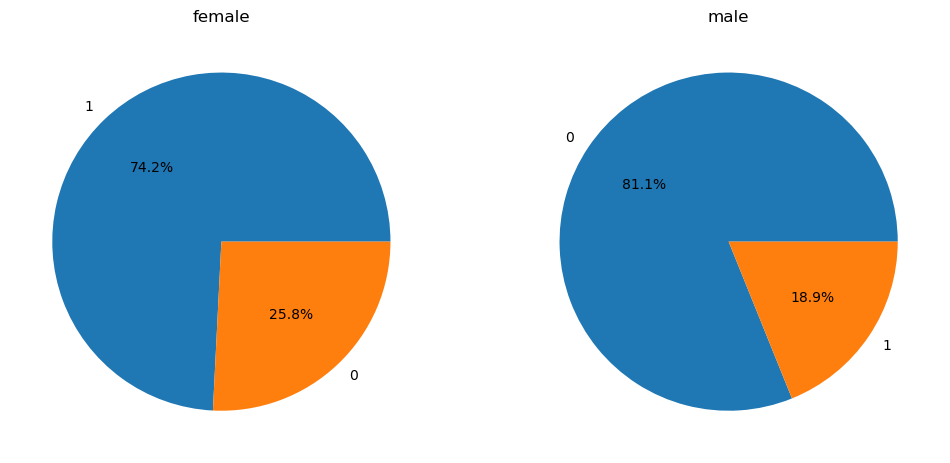

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,10))
cd = train_data.Sex.astype(str)
unique = np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train_data[train_data["Sex"]==unique[i]]["Survived"].value_counts()
    values.plot.pie(ax=ax, autopct="%1.1f%%")
    ax.set_title(str(unique[i]))
    ax.set_ylabel("")
    
plt.show()

# Data Coloumn of Siblings and Spouse

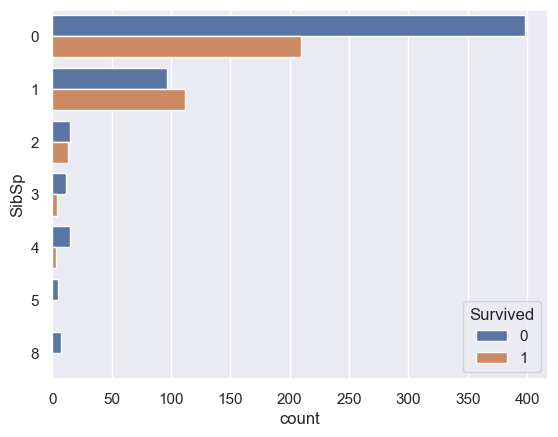

In [25]:
sns.set(style = "darkgrid")
sns.countplot(y="SibSp", hue="Survived", data= train_data)
plt.show()

# Data Coloumn Parch

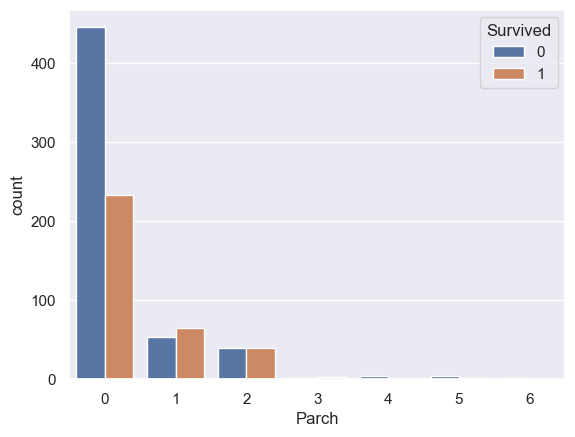

In [26]:
sns.set(style = "darkgrid")
sns.countplot(x="Parch", hue="Survived", data= train_data)
plt.show()

# Data Coloumn Embarked

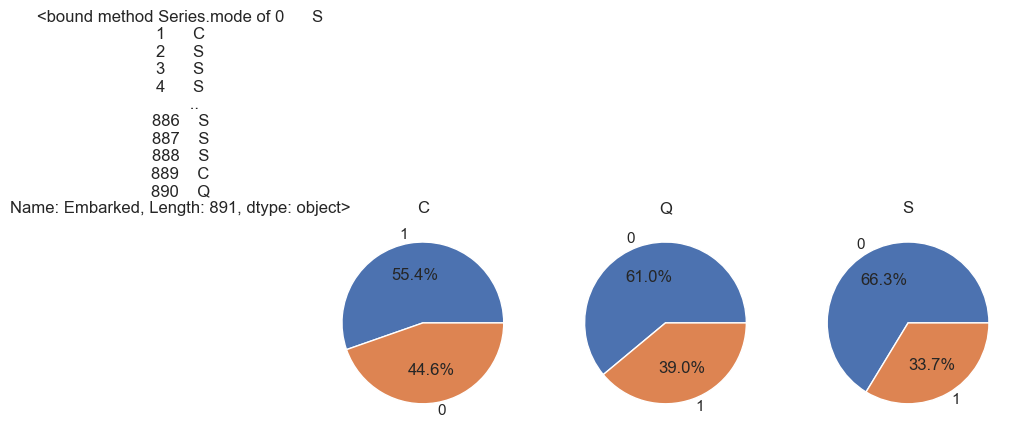

In [27]:
fig, axes = plt.subplots(1,4, figsize=(12,5))
pc = train_data.Embarked.astype(str)
unique = np.unique(pc)

for i, ax in enumerate(axes.flatten()):
    values = train_data[train_data["Embarked"]==unique[i]]["Survived"].value_counts()
    values.plot.pie(ax=ax, autopct="%1.1f%%")
    ax.set_title(str(unique[i]))
    ax.set_ylabel("")
    
plt.show() 

# Data Coloumn PClass and HEATMAP

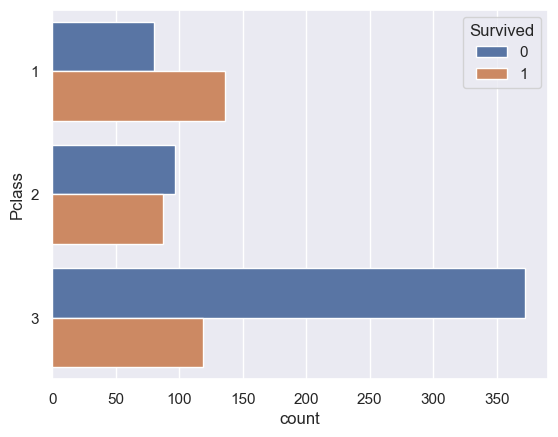

In [28]:
sns.set(style = "darkgrid")
sns.countplot(y="Pclass", hue="Survived", data=train_data)
plt.show()

In [29]:
plt.figure(figsize=(8,7))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 800x700 with 0 Axes>

# Data Preprocessing

In [ ]:
categorical_cols = train_data.select_dtypes(include="object")
categorical_cols.head()

In [ ]:
print("we have {} categorical out of {} total columns".
      format(len(categorical_cols.columns),train_data.shape[1]))

In [ ]:
cols = ["Embarked", "Sex", "Ticket", "Cabin"]
for i in cols:
    le = LabelEncoder()
    test_data[i] = le.fit_transform(test_data[i].astype(str))

# Dropping Unnecessary Data Columns

In [43]:
cols_to_drop = ["Name", "PassengerId"]
train_data.drop(cols_to_drop, 1, inplace=True)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [44]:
train_data.drop(["Name", "PassengerId"], axis = 1, inplace = True)

In [45]:
test_data.drop(["Name", "PassengerId"], axis = 1, inplace = True)

In [46]:
x = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [47]:
Rf = RandomForestClassifier(n_estimators=100, random_state=99)

In [48]:
Rf_result = cross_val_score(Rf, x,y, cv=10)
print("Random Forest Accuracy is: ", Rf_result)
Rf_result.mean()

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'female'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER1\anaconda3\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'male'


In [49]:
train_x, val_x, train_y, val_y = train_test_split(x,y, random_state = 42)
Rf.fit(train_x, train_y)

ValueError: could not convert string to float: 'male'

In [50]:
val_predictions = Rf.predict(val_x)
print(accuracy_score(val_y, val_predictions))

ValueError: could not convert string to float: 'male'

# Makinh Prediction on Test data

In [51]:
Rf.fit(x,y)

ValueError: could not convert string to float: 'male'

In [54]:
test_yhat = Rf.predict(test_data)

ValueError: could not convert string to float: 'male'

# Features in Hierachy of there Importance

In [60]:
features = train_data.columns
importances = Rf.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize(12,8))
plt.title("Feature Importances")
plt.barch(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), features[indices])
plt.ylabel("Relative Importance")

plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

# Saving and loading Models

In [55]:
import pickle

In [56]:
pickle.dump(Rf, open("titanicmodel","wb"))

In [58]:
model_path = pickle.load(open("titanicmodel", "rb"))